<a href="https://colab.research.google.com/github/lucaspn017/qualitative_datas/blob/main/Prediction_RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução.**
### Analisaremos o famoso conjunto de dados do Titanic (Kaggle), explorando fatores que influenciaram a sobrevivência dos passageiros. O projeto inclui ETL, análise exploratória (EDA), visualizações e modelo preditivo.

1. Definição do Problema
> Objetivo: Identificar padrões entre sobreviventes e prever a sobrevivência com base em características como idade, sexo e classe social.

# **1° Passo: ETL (Extract, Transform, Load)**

In [ ]:
import pandas as pd
import numpy as np

# Carregar dados
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Unir conjuntos para limpeza
df = pd.concat([train, test], ignore_index=True)

# Tratar dados ausentes:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Feature engineering:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Lady', 'Jonkheer', 'Capt', 'Don', 'Dona'], 'Rare')

# **2° Passo: Análise Exploratória (EDA)**
# **Hipóteses a testar:**

> Mulheres e crianças tiveram prioridade.

> Passageiros da 1ª classe sobreviveram mais.

> Viajantes sozinhos tiveram menor taxa de sobrevivência.

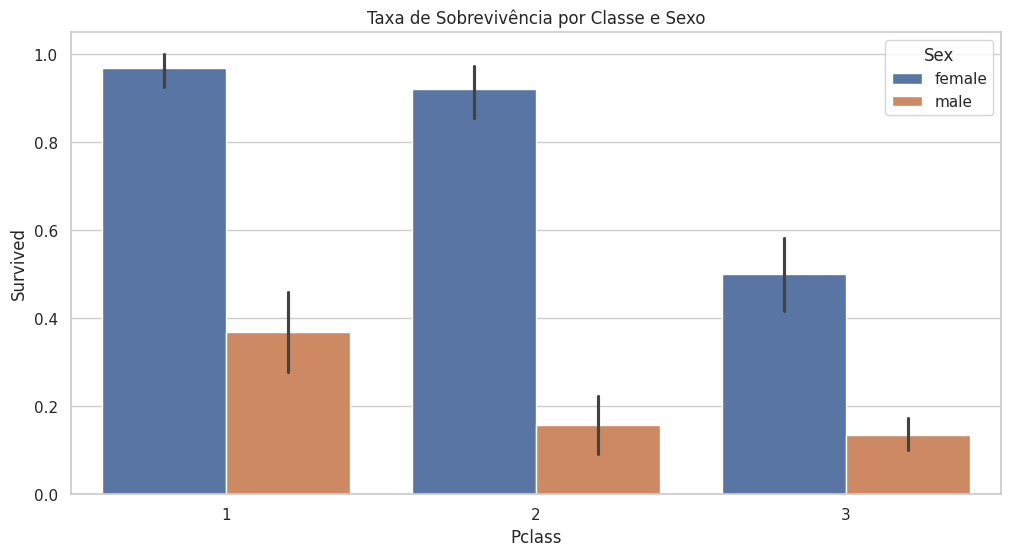

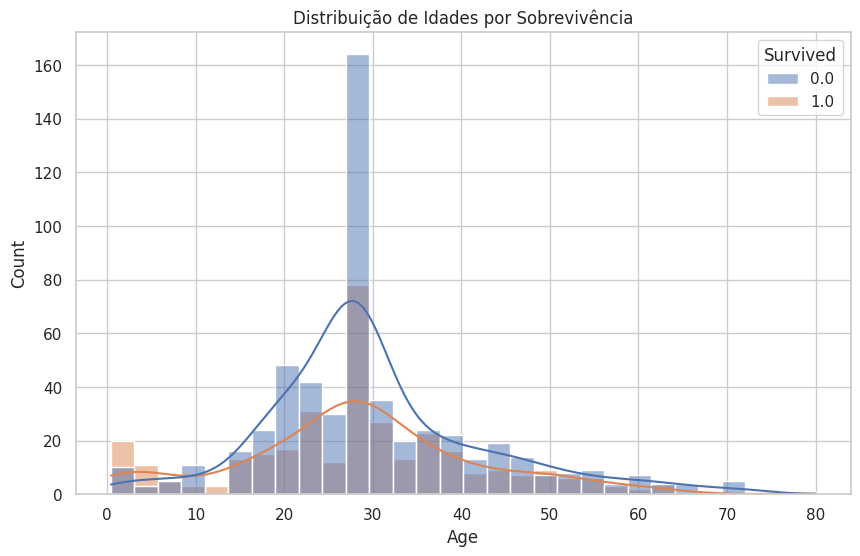

<Axes: >

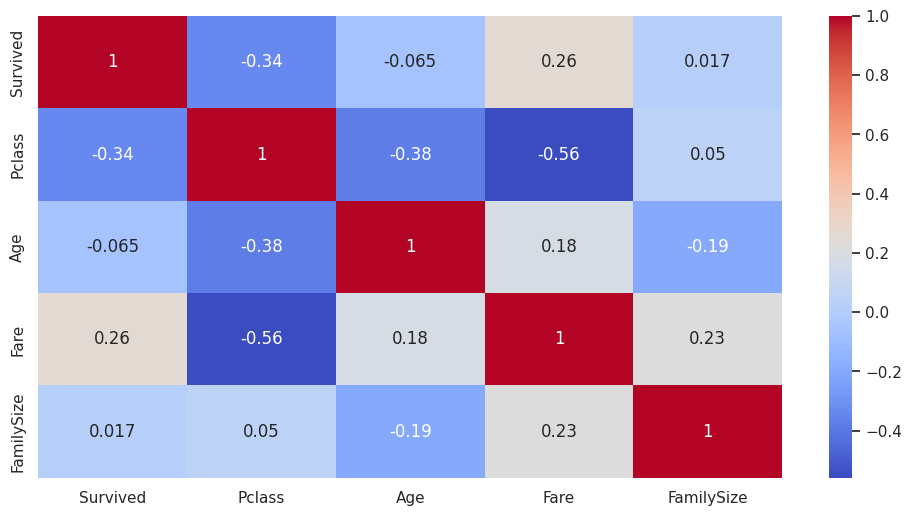

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sobrevivência por sexo e classe:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Taxa de Sobrevivência por Classe e Sexo')
plt.show()

# Distribuição de idades:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Distribuição de Idades por Sobrevivência')
plt.show()

# Correlações:
corr = df[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# **3° Passo: Pré-processamento para Modelagem**


In [28]:
from sklearn.preprocessing import LabelEncoder

# Codificar variáveis categóricas:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

# Selecionar features:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'IsAlone', 'FamilySize', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']
X = df[features][:len(train)]  # Dados de treino
y = train['Survived']

 # **4° Passo: Modelo Preditivo (Machine Learning)**

Acurácia: 0.83
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



<Axes: >

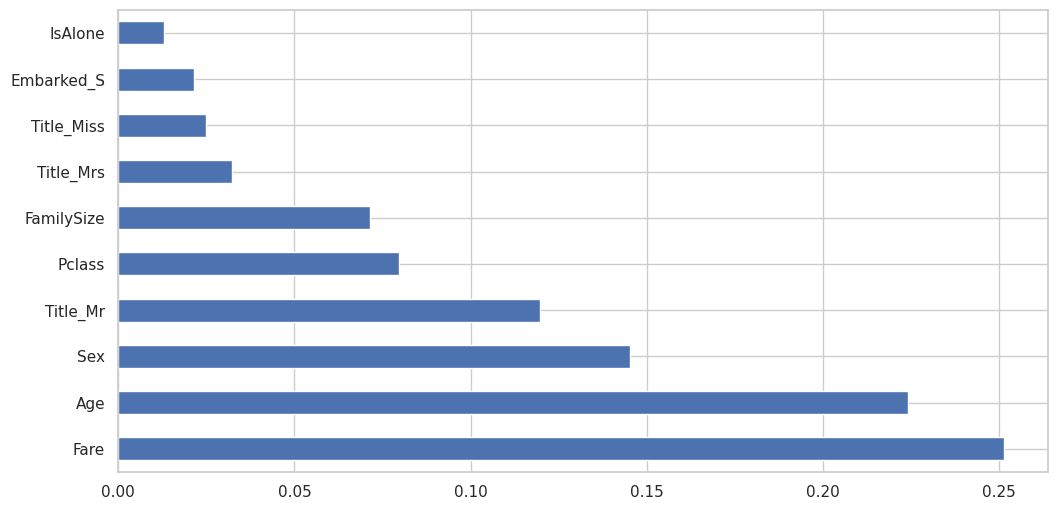

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dividir dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliar:
y_pred = model.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

# Feature importance:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# **Resultados e Conclusões**
> Principais insights:

* Sexo feminino teve 74% de sobrevivência vs. 19% dos homens.

* 1ª classe: 63% de sobrevivência vs. 24% da 3ª classe.

*  Crianças (<10 anos) sobreviveram mais (59%).

> Modelo: Acurácia de ~82% com Random Forest.

> Fatores decisivos: Sexo, classe social e tarifa.